<a href="https://colab.research.google.com/github/Edmontong/Bootcamp-25-midterm-Edmon-Alvina/blob/main/Midterm_Edmon%2BAlvina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project

Your midterm project will be a thematic exploration of a dataset of your choice/construction.  To begin, you are to identify a topical area of interest and whether or not you would be interested in working with a small group of your peers [here](https://docs.google.com/forms/d/e/1FAIpQLSeyrSEF1IsErHO_a1bVfcoOm2g5DbBD8rhZ_eyF4HwHkBQZVA/viewform?usp=header).



## Determining the Data Sources

For your data, you are to either build a dataset utilizing an API or identifying a website or sites to scrape.  These should be related to your topic of interest.  As a starting point, each group member should identify 2-3 resources in the form of an API or website(s) that look like they might be useful for your exploration.  Next class you will have time as a group to drill down specifics from the options you bring to the group.

## Exploratory Questions

You should come up with a few driving questions that you believe the data will give you insight into.  This is very general, and I give some examples of projects that I believe would be meaningful.  These are likely to change a bit as you dig into your data but work to be as specific about feature names and relationships or differences to be explored.

- **EXAMPLE 2**: You and some friends want to start a small investment fund where you pool your resources to make some basic investments in publicly traded companies.  You aim to use some basic balance sheet and cash flow analysis to evaluate the companies investment potential.

  - Data Source: `yfinance` library and `sec` api
  - Problem Statement:
      - Generalize a Valuation strategy and implement this on a selection of publicly listed companies
      - Identify top candidates for investment based on your valuations
      - Modularize the valuation strategy with functions or classes that can be reused for later analysis

Companies: Apple (AAPL), Microsoft(MSFT
), Circle(CRCL), Nvidia(NVDA), Meta (META
), Alphabet (GOOG)

data: Price to Earnings Ratio ; free cash flow;

[yfinance guide](https://algotrading101.com/learn/yfinance-guide/)

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
!pip install yfinance
import yfinance as yf

In [4]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'META', 'GOOG', 'CRCL']

In [5]:
data = {}  #For Price to Earnings Ratio

for ticker in tickers:

    stock = yf.Ticker(ticker)
    info = stock.info

    trailing_pe = info.get('trailingPE')   #trailing_pe -> the past 12 months
    forward_pe = info.get('forwardPE')     #forward_pe  -> the next 12 months

    data[ticker] = {
        'Trailing P/E': trailing_pe,
        'Forward P/E': forward_pe
    }

pe_df = pd.DataFrame.from_dict(data, orient = 'index')
pe_df.index.name = 'Ticker'
pe_df

,Trailing P/E,Forward P/E
Ticker,,
AAPL,38.341946,30.359806
MSFT,37.597366,34.353180
NVDA,52.051136,44.470875
META,26.041225,28.336561
GOOG,27.027687,28.356424
CRCL,NaN,101.388280


<Axes: xlabel='Ticker', ylabel='PE Ratio'>

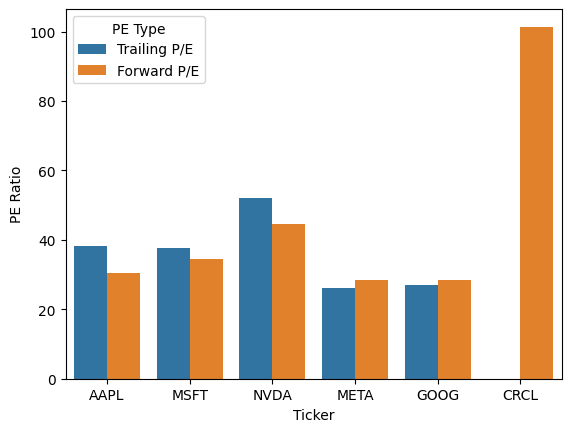

In [6]:
plot_df = pe_df.stack().reset_index()
plot_df.columns = ['Ticker', 'PE Type', 'PE Ratio']
sns.barplot(
    data=plot_df,
    x='Ticker',
    y='PE Ratio',
    hue='PE Type'
)

In [7]:
#Freecashflows
#Free cash flow = operating cf - investing cf
freecashflow = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  icf = cf.loc['Cash Flow From Continuing Investing Activities']
  fcf = []
  for i,j in zip(opc, icf):
    k = i - j
    fcf.append(k)
  freecashflow.append(fcf)
df = pd.DataFrame(freecashflow, columns=['2025','2024','2023','2022','2021'])
df.index = tickers
df.style.set_caption('Free Cash Flow (2021–2025)')
df



,2025,2024,2023,2022,2021
AAPL,1.153190e+11,1.068380e+11,1.445050e+11,1.185830e+11,NaN
MSFT,2.087610e+11,2.155180e+11,1.102620e+11,1.193460e+11,NaN
NVDA,8.451000e+10,3.865600e+10,-1.735000e+09,1.893800e+10,NaN
META,1.384780e+11,9.560800e+10,7.944500e+10,6.525300e+10,NaN
GOOG,1.708350e+11,1.288090e+11,1.117930e+11,1.271750e+11,NaN
CRCL,1.582750e+08,-8.370203e+09,8.415897e+09,-6.347500e+07,NaN


Text(0.5, 0, 'Year')

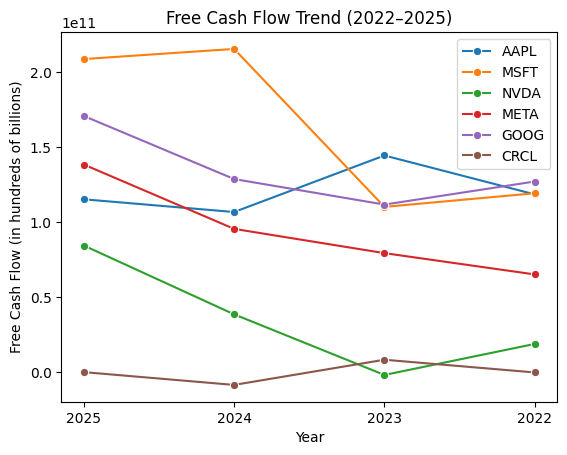

In [11]:
df_transposed = df.transpose()
sns.lineplot(data=df_transposed, dashes=False, marker='o')
plt.title('Free Cash Flow Trend (2022–2025)')
plt.ylabel('Free Cash Flow (in hundreds of billions)')
plt.xlabel('Year')

In [ ]:
#cash conversion ratio
#cash conversion ratio = opc/net income
cash_conversion_ratio = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  incomestatment = ticker.financials
  net_income = incomestatment.loc['Net Income']
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  ccr = []
  for i,j in zip(opc, net_income):
    k = i/j
    ccr.append(k)
  cash_conversion_ratio.append(ccr)
df = pd.DataFrame(cash_conversion_ratio, columns=['2025','2024','2023','2022','2021'])
df.index = tickers
df


,2025,2024,2023,2022,2021
AAPL,1.261564,1.139677,1.223921,1.098838,NaN
MSFT,1.337124,1.345058,1.210348,1.224051,NaN
NVDA,0.879377,0.943884,1.291209,0.933962,NaN
META,1.464529,1.818840,2.175647,1.465151,NaN
GOOG,1.251513,1.378765,1.525629,1.205424,NaN
CRCL,2.213546,0.521629,0.094548,0.181668,NaN
